# Visualization on Heart-H Dataset

In [39]:
from src.read.processing import Processing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 1. Load Data

Heart-h dataset is composed by 294 instances and 14 attributes, including the predicted one "num". The features are both categorical and numerical. This predicted attribute signifies the diagnosis of angiographic heart disease, classifying cases into two categories. A value of 0 indicates less than 50% diameter narrowing in the coronary arteries, suggesting a less severe condition. Conversely, a value of 1 denotes more than 50% diameter narrowing, indicating a more critical and potentially advanced stage of heart disease. 

We are displaying the first 3 samples of the dataset and 6 features in the following table:

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dataclass = Processing(source_path='input/datasets/')
df_orig = dataclass.read('heart-h').copy()
dataclass.general_preprocessing()
df = dataclass.df.copy()

df.iloc[:3, :6]


,trestbps,chol,thalach,oldpeak,num,age
0,-0.146571,-1.822595,1.951019,-0.646074,0,28
1,-0.715815,-0.111523,0.887616,-0.646074,0,29
2,0.422673,-0.111523,1.312977,-0.646074,0,29


# 2. Analyze your PCA algorithm in three data sets

We'll be analysing the Hearth-H dataset in this section, following the same data preprocessing steps as in the previous section, altough now he have both categorical and numerical features.


## 2.1. Handmade PCA

In [41]:
from src.decomposition.PCA import PCA

X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]

pca = PCA(n_components=X.shape[1])
X_transformed = pca.fit_transform(X)
df_pca = pd.DataFrame(X_transformed, columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_pca['num'] = df_orig['num']

In [42]:
df_pca.iloc[:3, :5]

,PC1,PC2,PC3,PC4,PC5
0,19.942972,-0.775490,-1.432465,-0.661341,-0.503625
1,18.884515,-0.165038,0.172079,0.062065,0.300040
2,18.873458,0.001048,0.089637,-1.100515,0.017054


In [43]:
df_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
count,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02,2.940000e+02
mean,-7.661294e-15,1.146098e-16,-1.269770e-16,2.900174e-16,-1.036114e-15,6.561267e-16,-5.162159e-16,5.611535e-16,1.215959e-16,-1.338687e-16,9.856062e-16,6.085457e-16,-3.607281e-16,2.784998e-17,-2.501778e-18,1.311309e-16,-2.675958e-16,3.087100e-17,-9.913886e-17,9.817193e-18,6.262721e-16,-3.121912e-17
std,7.835270e+00,1.307990e+00,9.757137e-01,9.368646e-01,8.115657e-01,5.646234e-01,5.249738e-01,4.519087e-01,4.242909e-01,3.656728e-01,3.391418e-01,2.694416e-01,2.502781e-01,1.804793e-01,1.734407e-01,1.648201e-01,1.516985e-01,1.423246e-01,1.066374e-01,5.415396e-02,3.876227e-02,3.130474e-02
min,-1.829171e+01,-2.097980e+00,-2.456299e+00,-3.175192e+00,-2.354213e+00,-1.775204e+00,-1.418635e+00,-1.533876e+00,-1.047806e+00,-1.499048e+00,-1.044377e+00,-1.057312e+00,-1.006650e+00,-1.002597e+00,-8.926934e-01,-6.456526e-01,-6.375557e-01,-8.850583e-01,-6.237944e-01,-8.542288e-01,-7.396274e-02,-6.650314e-02
25%,-6.139552e+00,-1.010586e+00,-6.058154e-01,-5.629263e-01,-6.096239e-01,-2.712387e-01,-3.490986e-01,-2.772719e-01,-3.024544e-01,-7.447401e-02,-1.844245e-01,-8.922470e-02,-7.996872e-02,-2.669474e-02,-1.257901e-02,-5.422533e-02,-6.112592e-02,-2.754309e-02,-7.597382e-03,-7.613522e-03,-5.275826e-03,-3.382478e-03
50%,-1.006625e+00,-3.746159e-01,-5.635322e-02,1.622571e-01,-5.424970e-02,1.360190e-01,-2.869240e-02,8.960227e-02,-7.651067e-02,1.011767e-01,-1.532231e-02,4.940233e-02,1.983746e-02,2.680975e-02,2.133854e-02,1.666181e-02,2.969899e-02,2.037007e-02,1.062232e-02,-1.207019e-04,2.963785e-04,4.591988e-04
75%,5.856893e+00,9.020613e-01,4.603938e-01,6.591103e-01,5.559384e-01,4.349367e-01,4.742823e-01,2.860049e-01,2.856202e-01,1.931087e-01,1.934152e-01,1.354615e-01,1.131656e-01,6.989663e-02,6.980840e-02,5.246038e-02,7.265450e-02,6.698301e-02,3.286519e-02,9.415596e-03,5.177822e-03,4.418037e-03
max,1.994297e+01,4.280725e+00,5.008286e+00,2.783377e+00,2.278664e+00,9.692482e-01,1.147417e+00,1.220085e+00,1.200886e+00,7.430148e-01,8.638978e-01,8.314452e-01,8.577367e-01,4.225386e-01,3.284366e-01,6.435748e-01,5.464477e-01,3.034643e-01,2.105314e-01,9.499028e-02,6.207672e-01,4.962028e-01


The tables above represent the principal components of the data set. Key insights regarding the PCA algorithm can be observed:

- The mean values of the principal components are all close to zero, signifying that the data is centered around the origin.
- The standard deviation of PC1 is 7.83, indicating variability along this component, and the consequent components have lower standard deviations, which suggests less variability along these directions.
- The first principal component also demonstrates a large range of values, highlighting the broad data amplitude along this component, when compared to the other components.

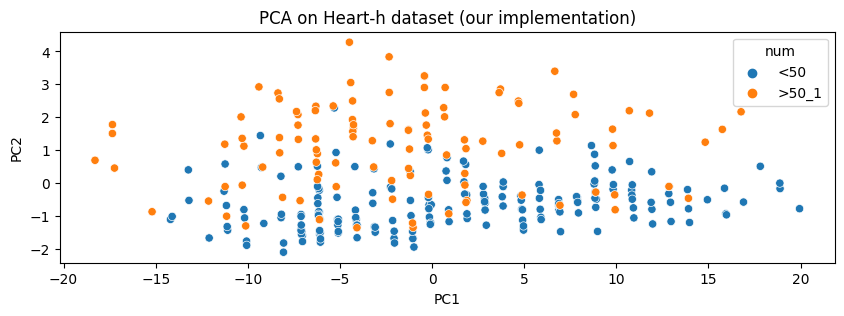

In [44]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PC1', y='PC2', hue='num', data=df_pca)
plt.title("PCA on Heart-h dataset (our implementation)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

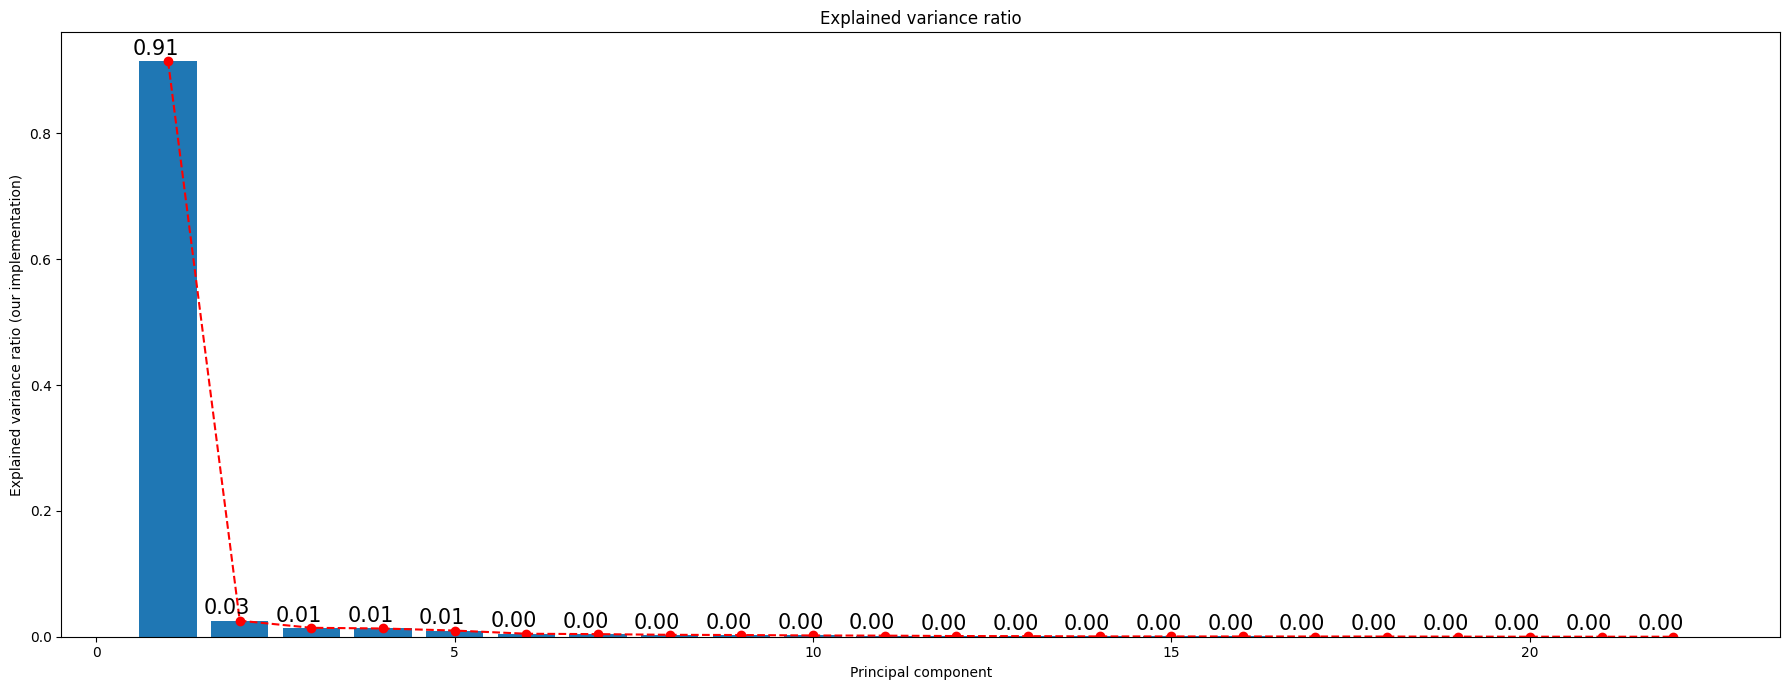

In [45]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio (our implementation)")
plt.tight_layout()
plt.show()

In [46]:

from src.utils.utils import df_to_markdown

df_to_markdown(df_pca.describe(), 'output_table.md')

In the graphic representations above, we can observe that PC1 and PC2 are clearly able to separate the data into two different classes. The first component is able to capture the most important information of the data set, with a proportion of variance of 0.91.

The high variance explained by PC1 in the results could be attributed to several factors in the preprocessing pipeline, such as standardizing numerical features, imputing missing values with the median, and encoding categorical variables. 

## 2.2. Sklearn PCA

In [47]:
# Same with sklearn PCA
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=X.shape[1])
X_sk_transformed = sklearn_pca.fit_transform(X)
df_skpca = pd.DataFrame(X_sk_transformed, 
                        columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_skpca['num'] = df_orig['num']

df_skpca.iloc[:3, :5]

,PC1,PC2,PC3,PC4,PC5
0,19.942972,-0.775490,-1.432465,0.661341,0.503625
1,18.884515,-0.165038,0.172079,-0.062065,-0.300040
2,18.873458,0.001048,0.089637,1.100515,-0.017054


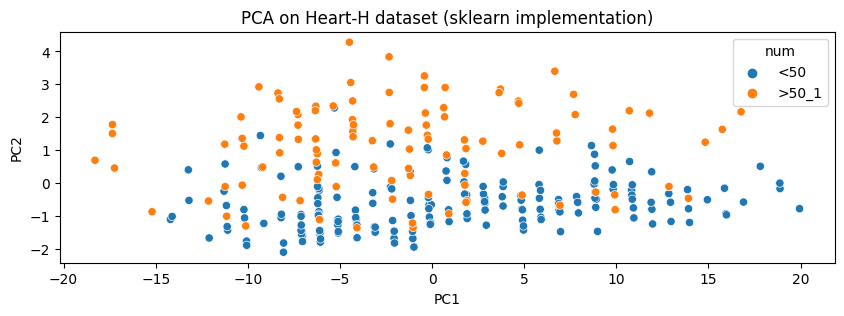

In [48]:

# Plot
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PC1', y='PC2', hue='num', data=df_skpca)
plt.title("PCA on Heart-H dataset (sklearn implementation)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

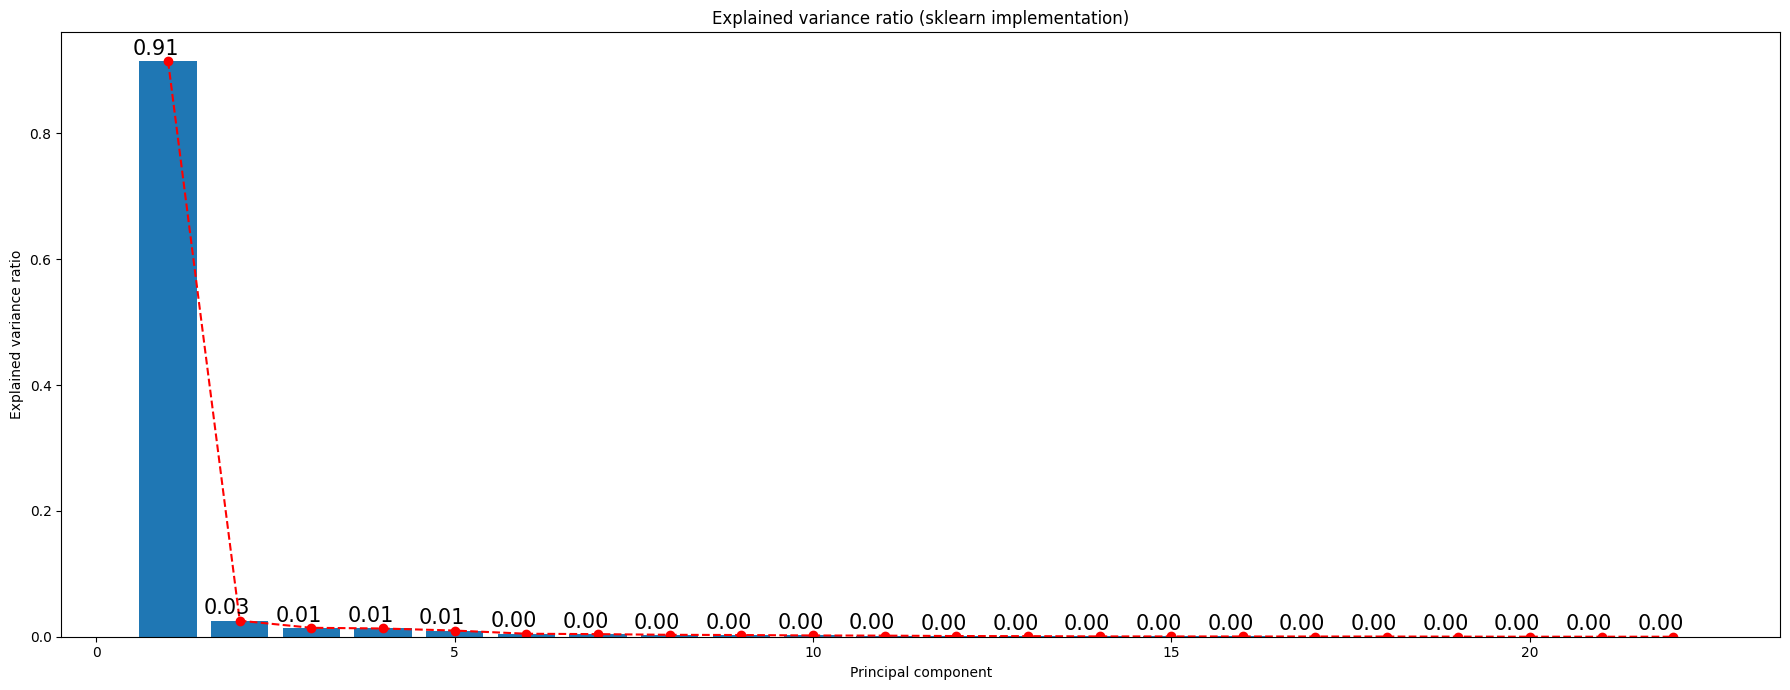

In [49]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (sklearn implementation)")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

# 3. Compare with IncrementalPCA

In [50]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=X.shape[1])
X_ipca_transformed = ipca.fit_transform(X)
df_ipca = pd.DataFrame(X_ipca_transformed, 
                        columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_ipca['num'] = df_orig['num']

df_ipca.iloc[:3, :5]

,PC1,PC2,PC3,PC4,PC5
0,-19.942972,-0.775490,-1.432465,0.661341,0.503625
1,-18.884515,-0.165038,0.172079,-0.062065,-0.300040
2,-18.873458,0.001048,0.089637,1.100515,-0.017054


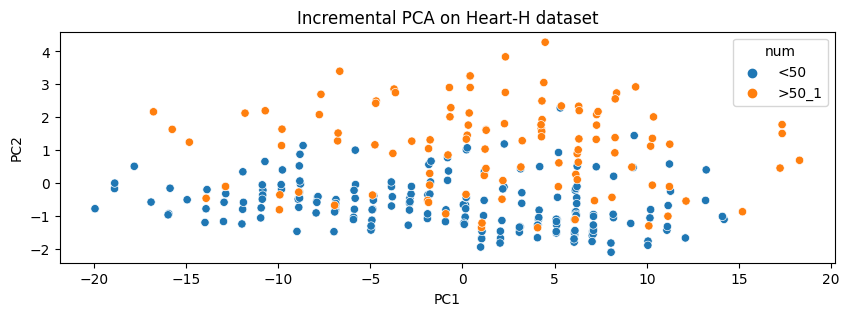

In [51]:
# Plot
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PC1', y='PC2', hue='num', data=df_ipca)
plt.title("Incremental PCA on Heart-H dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

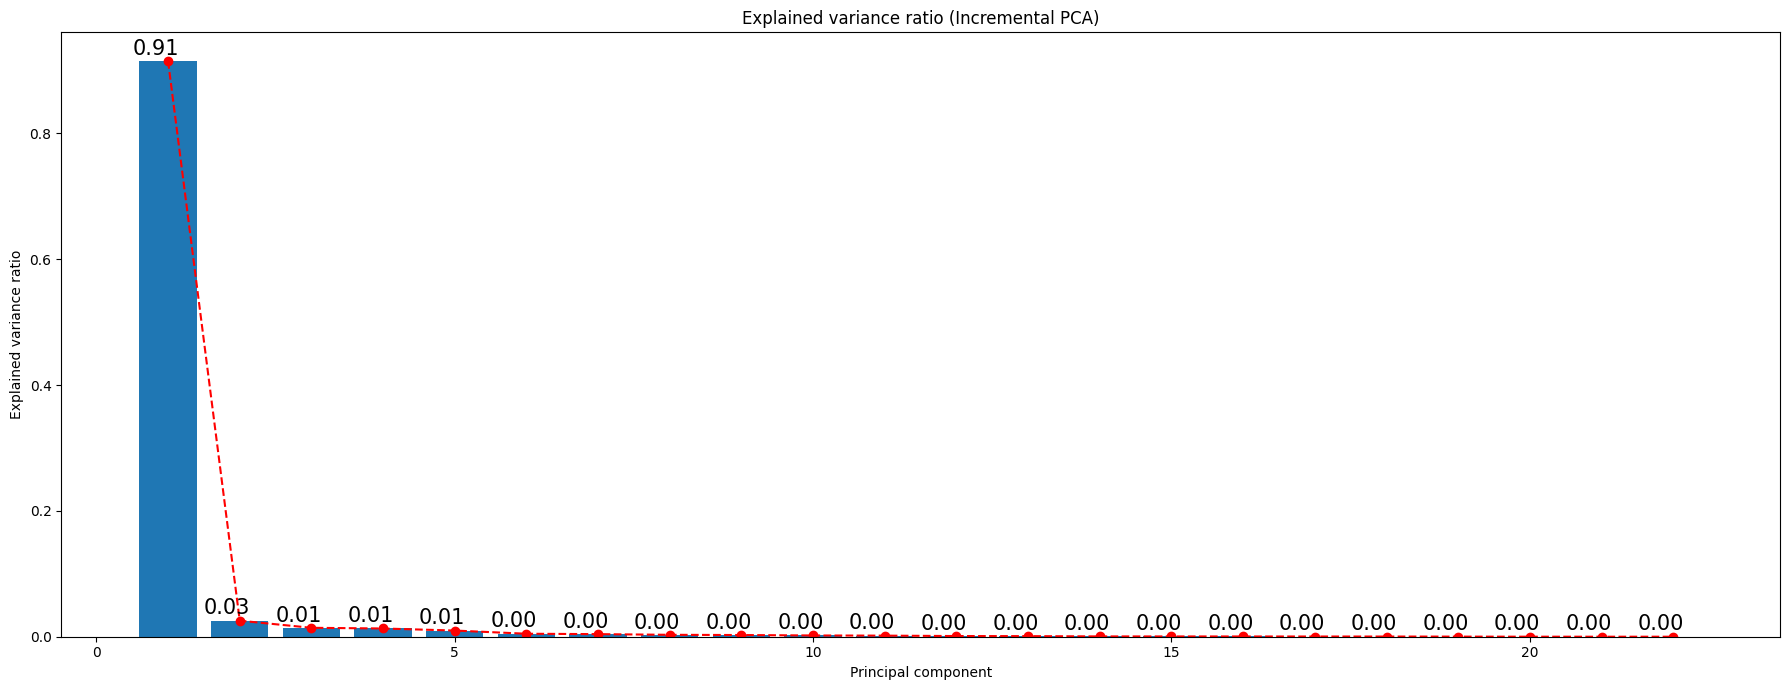

In [52]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), ipca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), ipca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (Incremental PCA)")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

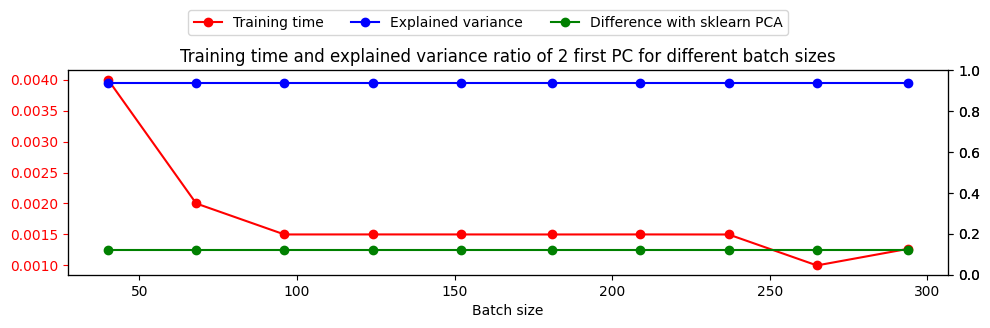

In [53]:
# Compare training time for different values of batch size
from time import time

batch_sizes = np.linspace(40, X.shape[0], 10, dtype=int)
times = []
explained = []
diffs = []
for batch_size in batch_sizes:
    ipca = IncrementalPCA(n_components=X.shape[1], batch_size=batch_size)
    start = time()
    ipca.fit(X)
    end = time()
    times.append(end - start)

    pct_explained_variance = ipca.explained_variance_ratio_[:2].sum()
    explained.append(pct_explained_variance)

    avg_dif = np.abs(ipca.components_ - sklearn_pca.components_).mean()
    diffs.append(avg_dif)

# Create double y axis plot
fig, ax1 = plt.subplots(figsize=(10, 3))
ax1.plot(batch_sizes, times, linestyle='-', marker='o', color='r', label='Training time')
ax1.set_xlabel('Batch size')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.plot(batch_sizes, explained, linestyle='-', marker='o', color='b', label='Explained variance')
ax2.set_ylim([0, 1])

ax3 = ax1.twinx()
ax3.plot(batch_sizes, diffs, linestyle='-', marker='o', color='g', label='Difference with sklearn PCA')
ax3.set_ylim([0, 1])

fig.legend(bbox_to_anchor=(0.8, 1.1), ncol=3)
plt.title("Training time and explained variance ratio of 2 first PC for different batch sizes")
fig.tight_layout()

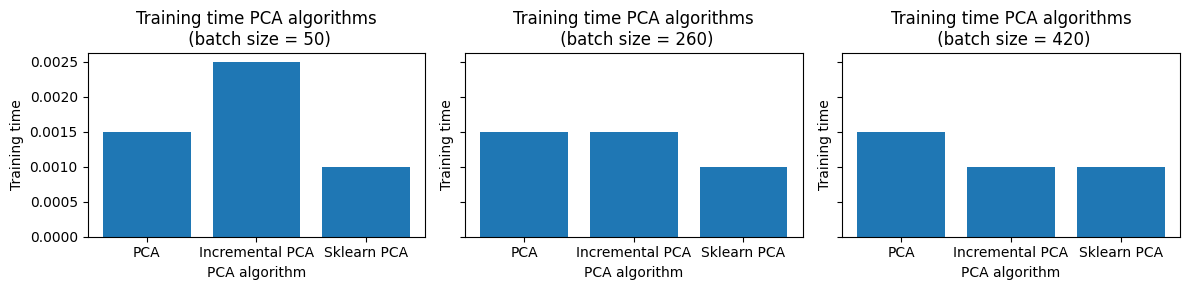

In [54]:
# Plot comparison of training time for PCA, Handmade PCA and Incremental PCA
from time import time

pca = PCA(n_components=X.shape[1])
start = time()
pca.fit(X)
end = time()
pca_time = end - start

sklearn_pca = sklearnPCA(n_components=X.shape[1], random_state=0)
start = time()
sklearn_pca.fit(X)
end = time()
sklearn_pca_time = end - start

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
ls_batch_sizes = [50, 260, 420]

for i, bs in enumerate(ls_batch_sizes):
    ipca = IncrementalPCA(n_components=X.shape[1], batch_size=bs)
    start = time()
    ipca.fit(X)
    end = time()
    ipca_time = end - start

    ax[i].bar(['PCA', 'Incremental PCA', 'Sklearn PCA'], [pca_time, ipca_time, sklearn_pca_time])
    ax[i].set_title("Training time PCA algorithms\n (batch size = {})".format(bs))
    ax[i].set_xlabel("PCA algorithm")
    ax[i].set_ylabel("Training time")
fig.tight_layout()
plt.show()

# 4. Use PCA with k-Means and BIRCH to compare performances

In [55]:
from sklearn.cluster import Birch
from src.clustering.KMeans import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, v_measure_score, confusion_matrix, classification_report

In [56]:
X = df.iloc[:, :-1]
y = df['num']

n_clusters = 9

birch = model_dbs = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Birch())
])

kmeans = model_dbs = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(k=n_clusters, max_iterations=100, random_state=0))])



In [57]:
def evaluate_model(model, X, y):

    model.fit(X)
    y_pred = model['model'].labels_
        
    try:
        silhouette = silhouette_score(X, y_pred)
    except Exception as e:
        print(f"An error occurred during silhouette score calculation: {e}")
        silhouette = 0

    try:
        v_measure = v_measure_score(y, y_pred)
    except Exception as e:
        print(f"An error occurred during v-measure score calculation: {e}")
        v_measure = 0

    return silhouette, v_measure

# Cluster the transformed Data using BIRCH

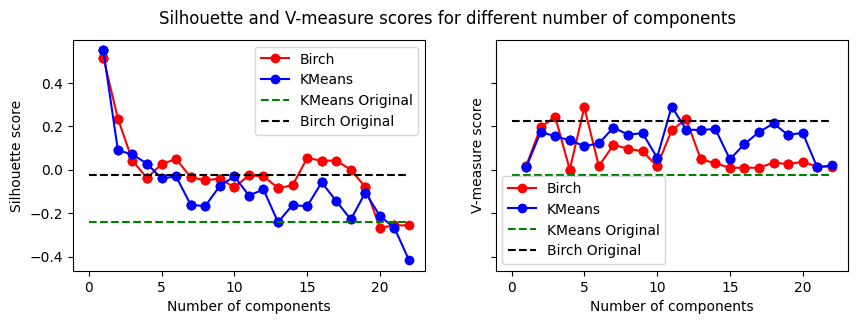

In [58]:
m = X.shape[1]
n_components = np.linspace(1, m, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []
for n in n_components:
    X_transformed = df_pca.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before PCA
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before PCA
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components")

plt.show()



In [59]:
print("Evaluation results on BIRCH using the original dataset")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(birch, X, y)))

print("-"*50)

print("Evaluation results on KMeans using the original dataset")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(kmeans, X, y)))

print("-"*50)

print("Evaluation results on Birch using the PC1")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(birch, df_pca.iloc[:, :1], y)))

print("-"*50)

print("Evaluation results on KMeans using the PC1")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(kmeans, df_pca.iloc[:, :1], y)))


Evaluation results on BIRCH using the original dataset
Silhouette -0.02 - V-Measure 0.23
--------------------------------------------------
Evaluation results on KMeans using the original dataset
Silhouette -0.24 - V-Measure 0.01
--------------------------------------------------
Evaluation results on Birch using the PC1
Silhouette 0.51 - V-Measure 0.02
--------------------------------------------------
Evaluation results on KMeans using the PC1
Silhouette 0.55 - V-Measure 0.01


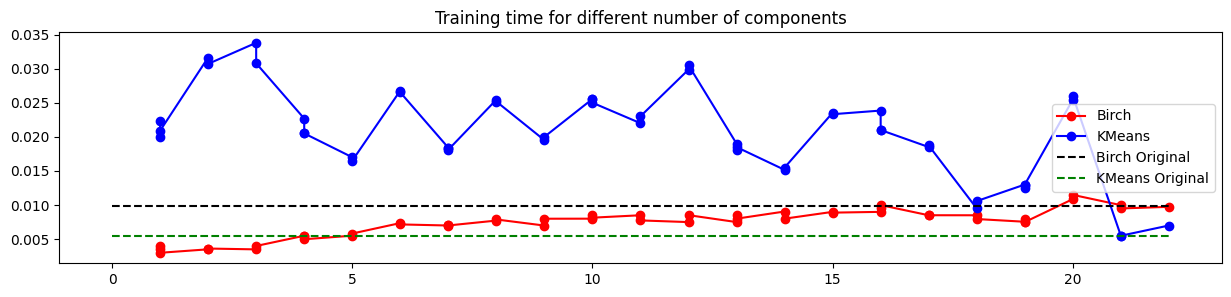

In [60]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_pca.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 3), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

# 5. Cluster the transformed Data (SVD) using K-Means and Birch

## Non Centered Data

In [61]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=X.shape[1] - 1)

X_transformed_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_transformed_svd, 
                        columns=[f'SV{i}' for i in range(1, X.shape[1])])
df_svd['num'] = df_orig['num']

df_svd.iloc[:3, :5]

,SV1,SV2,SV3,SV4,SV5
0,28.033093,-2.256916,-1.386641,0.276079,1.215486
1,29.049893,-1.571977,0.226575,-0.307312,0.409026
2,29.050171,-1.397763,0.123121,0.773328,0.916765


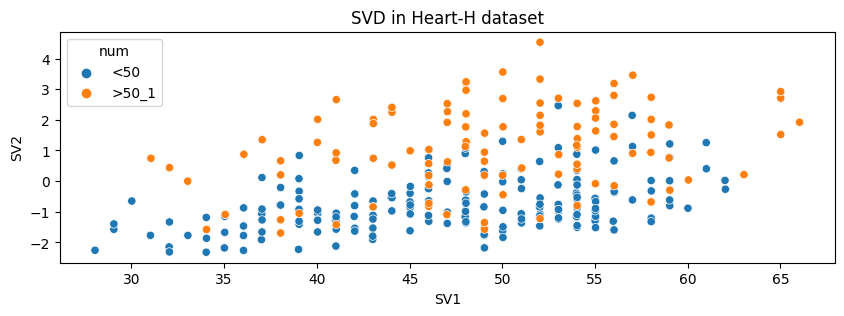

In [62]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.scatterplot(x='SV1', y='SV2', hue='num', data=df_svd)
plt.title("SVD in Heart-H dataset")
plt.xlabel("SV1")
plt.ylabel("SV2")
plt.show()

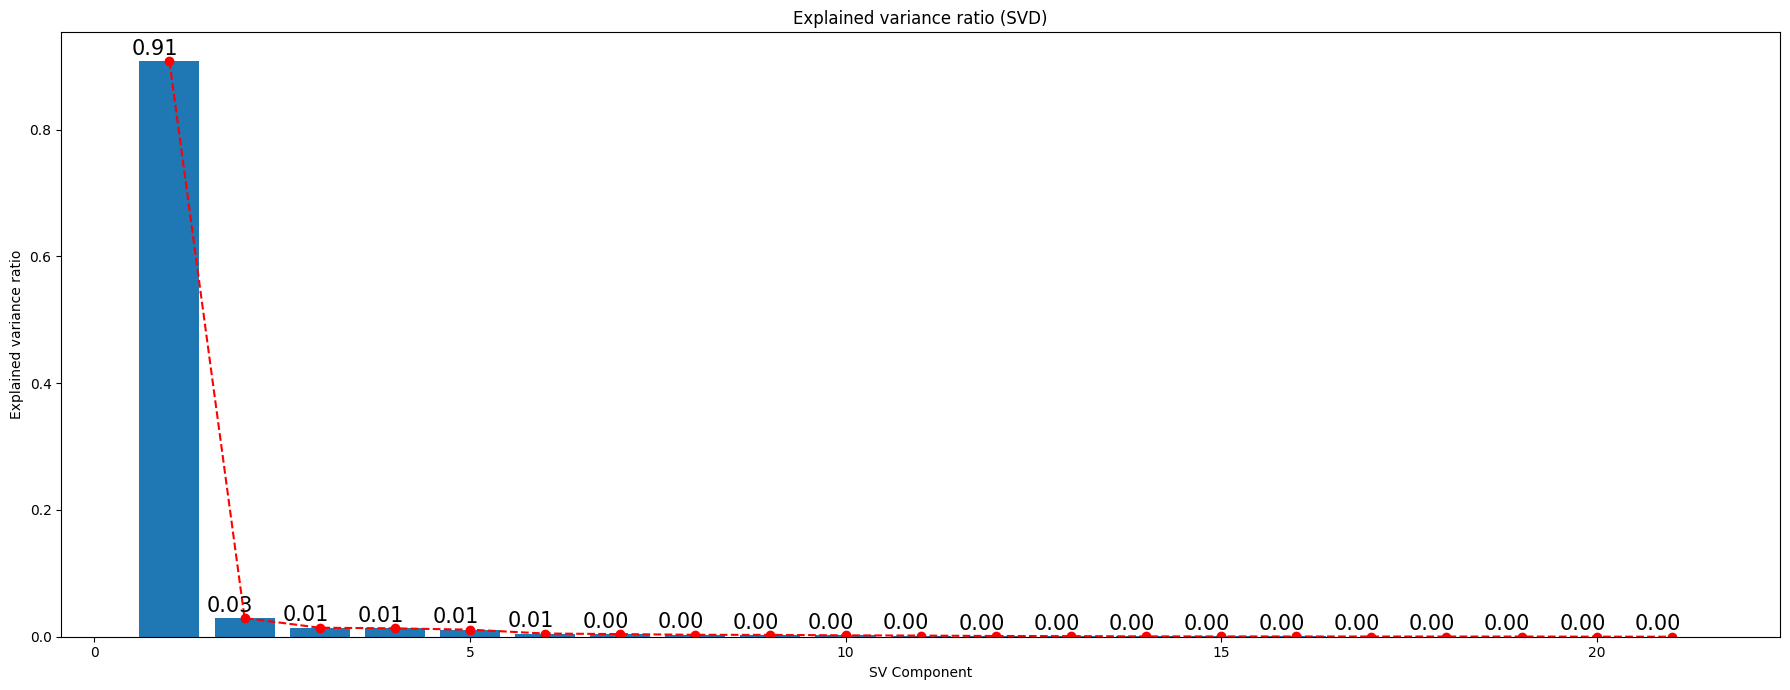

In [63]:
# Plot explained variance
svd_in = svd
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1]), svd_in.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1]), svd_in.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), svd_in.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (SVD)")
plt.xlabel("SV Component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

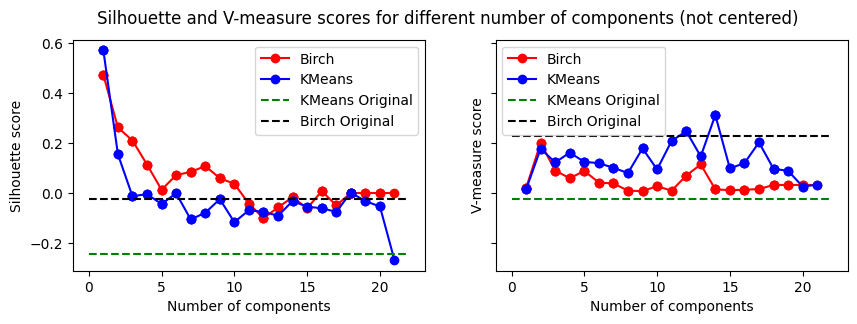

In [64]:
m = X.shape[1]
n_components = np.linspace(1, m - 1, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_svd.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components (not centered)")

plt.show()

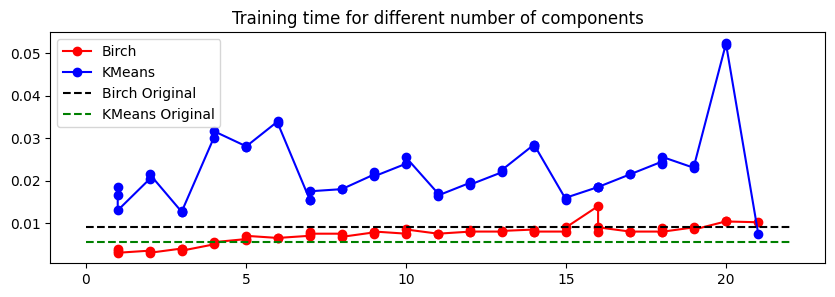

In [65]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m - 1, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_svd.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

## Centered Version

In [66]:
from sklearn.decomposition import TruncatedSVD
svd = Pipeline([
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=X.shape[1] - 1))])

X_transformed_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_transformed_svd, 
                        columns=[f'SV{i}' for i in range(1, X.shape[1])])
df_svd['num'] = df_orig['num']

df_svd.iloc[:3, :5]

,SV1,SV2,SV3,SV4,SV5
0,-2.977704,1.614314,-0.712664,0.343752,2.192470
1,-2.383444,-0.864070,0.040100,-0.608507,1.955827
2,-2.326853,-0.824022,0.066377,-0.683302,1.706566


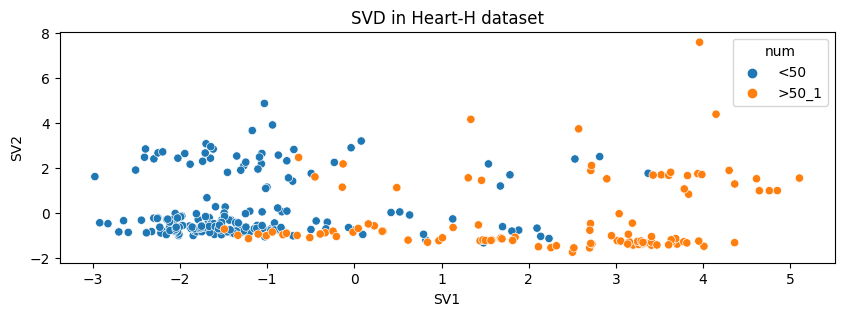

In [67]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.scatterplot(x='SV1', y='SV2', hue='num', data=df_svd)
plt.title("SVD in Heart-H dataset")
plt.xlabel("SV1")
plt.ylabel("SV2")
plt.show()

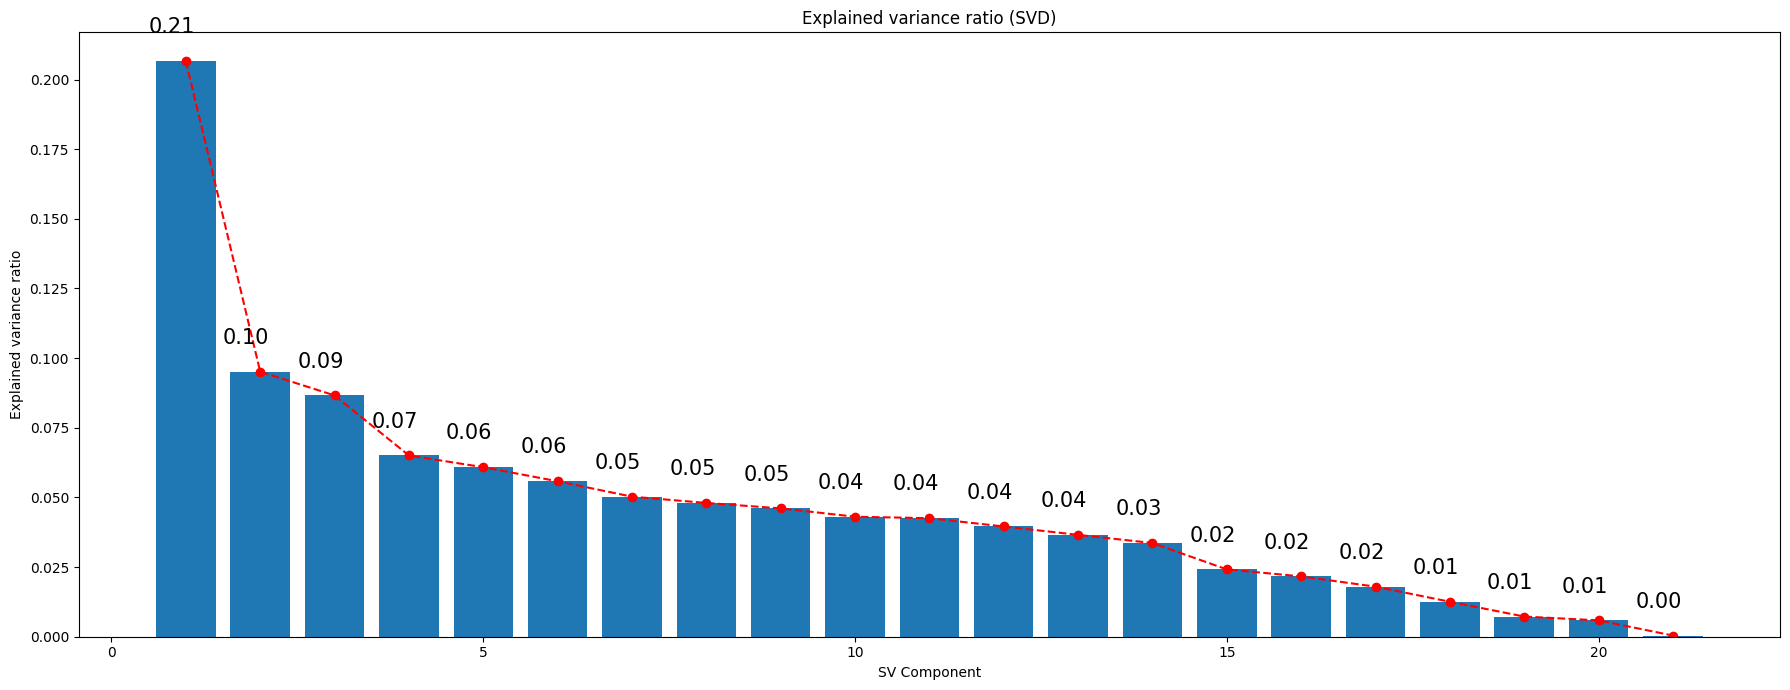

In [68]:
# Plot explained variance
svd_in = svd['svd']
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1]), svd_in.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1]), svd_in.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), svd_in.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (SVD)")
plt.xlabel("SV Component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

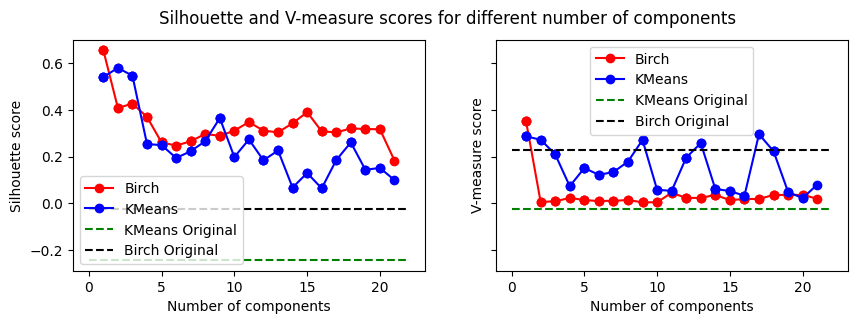

In [69]:
m = X.shape[1]
n_components = np.linspace(1, m - 1, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_svd.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components")

plt.show()



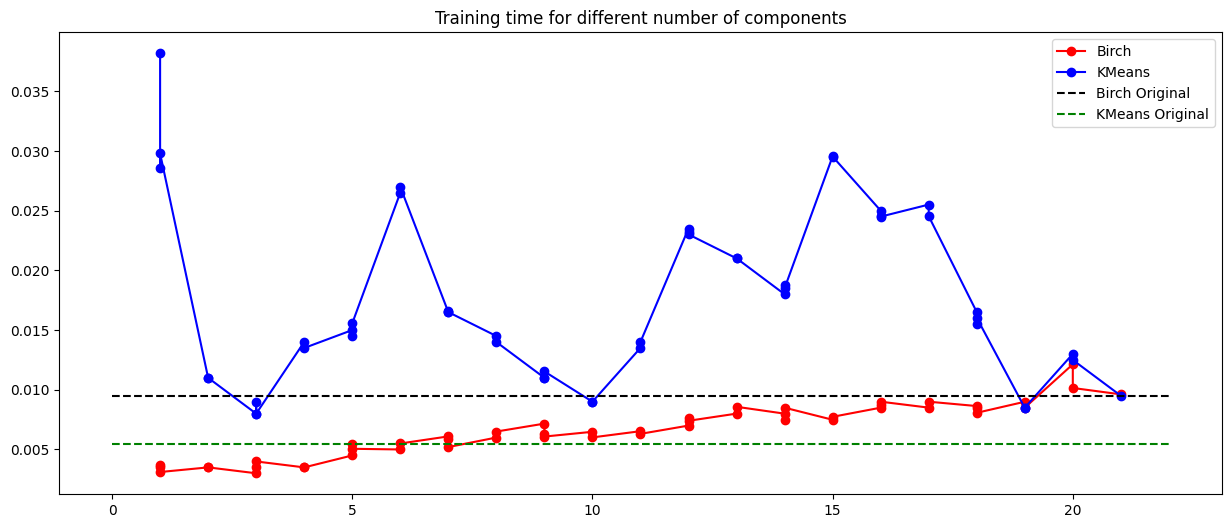

In [70]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m - 1, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_svd.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

In [71]:
print("Evaluation results on BIRCH using the transformed dataset")
evaluate_model(birch, X_transformed_svd[:, :1], y)

Evaluation results on BIRCH using the transformed dataset


(0.6546759972932523, 0.35097075746552553)

In [72]:
print("Evaluation results on KMeans using the transformed dataset")
evaluate_model(kmeans, X_transformed_svd[:, :1], y)

Evaluation results on KMeans using the transformed dataset


(0.5402065677338467, 0.28611040977759794)

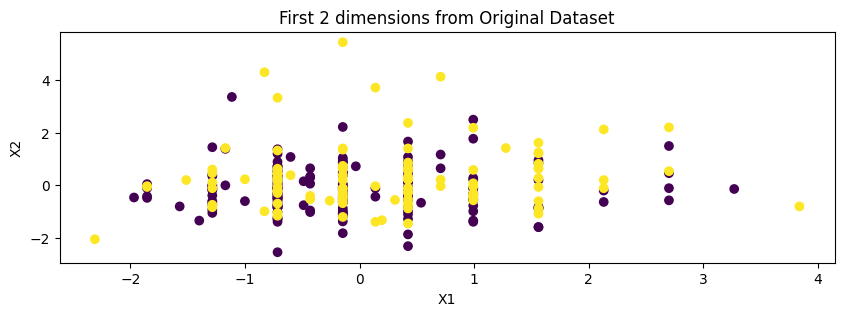

In [73]:
# Visualize the original Dataset
plt.figure(figsize=(10, 3))
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], c=df['num'])
plt.title("First 2 dimensions from Original Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 6. Visualize in low-dimensional space

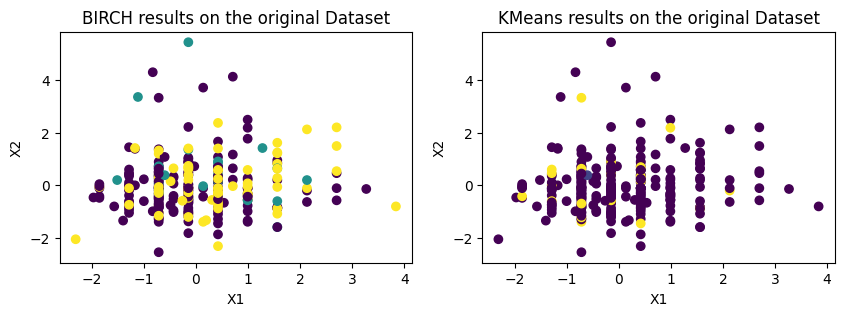

In [74]:
birch.fit(X)
kmeans.fit(X)

# Visualize the results of BIRCH and KMenas on the original Dataset
figure, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=birch['model'].labels_)
axs[0].set_title("BIRCH results on the original Dataset")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")

axs[1].scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=kmeans['model'].labels_)
axs[1].set_title("KMeans results on the original Dataset")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
plt.show()

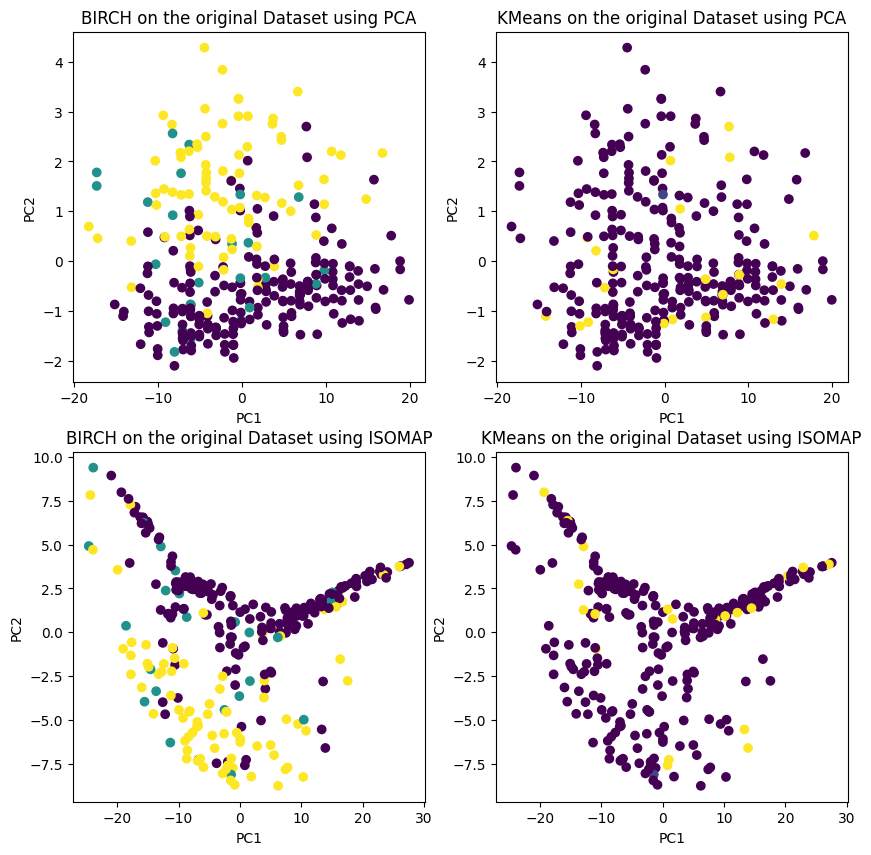

In [75]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)

X_transformed = pca.fit_transform(X)
X_transformed_isomap = isomap.fit_transform(X)

# Visualize results of BIRCH and KMeans on the original Dataset using PCA and ISOMAP
figure, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(X_transformed[:, 0], X_transformed[:, 1], c=birch['model'].labels_)
axs[0, 0].set_title("BIRCH on the original Dataset using PCA")
axs[0, 0].set_xlabel("PC1")
axs[0, 0].set_ylabel("PC2")

axs[0, 1].scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeans['model'].labels_)
axs[0, 1].set_title("KMeans on the original Dataset using PCA")
axs[0, 1].set_xlabel("PC1")
axs[0, 1].set_ylabel("PC2")

axs[1, 0].scatter(X_transformed_isomap[:, 0], X_transformed_isomap[:, 1], c=birch['model'].labels_)
axs[1, 0].set_title("BIRCH on the original Dataset using ISOMAP")
axs[1, 0].set_xlabel("PC1")
axs[1, 0].set_ylabel("PC2")

axs[1, 1].scatter(X_transformed_isomap[:, 0], X_transformed_isomap[:, 1], c=kmeans['model'].labels_)
axs[1, 1].set_title("KMeans on the original Dataset using ISOMAP")
axs[1, 1].set_xlabel("PC1")
axs[1, 1].set_ylabel("PC2")
fig.tight_layout()
plt.show()
